Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [19]:
import logging
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm

logging.basicConfig(
    format="[%(asctime)s] %(levelname)s: %(message)s",
    datefmt="%H:%M:%S",
    level=logging.INFO,
)

In [20]:
def rastrigin(x, A=10):
    """NumPy Rastrigin test function"""
    return -np.sum(A - A * np.cos(2 * np.pi * x) + x**2, axis=0)

def sphere(x):
    """NumPy Sphere test function"""
    return -np.sum(x**2, axis=0)

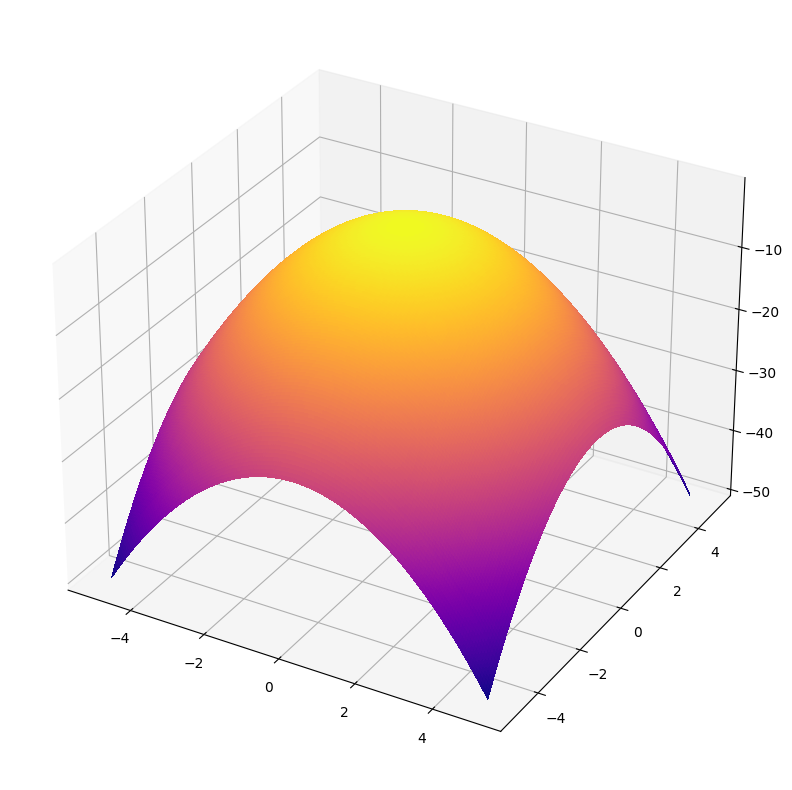

In [3]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
#z = rastrigin(x)
z = sphere(x)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

In [4]:
np.random.seed(42)
N_DIM = 2
rng = np.random.default_rng(42)

In [28]:
def one_plus_one(dimensions, sigma=0.5):
    # Get random initial position in N-dimensional space
    x = list(rng.random() for _ in range(dimensions))
    
    # Get value on given position
    res = sphere(np.array(x))

    useless_tries = 0
    num_of_iterations = 0
    while useless_tries < 10000:
        num_of_iterations += 1
        x_prime = []
        for dim in range(dimensions):  
            x_prime.append(x[dim] + np.random.normal(0, sigma))
        new_res = sphere(np.array(x_prime))
        if new_res > res:
            useless_tries = 0
            x = x_prime
            res = new_res 
        else:
            useless_tries += 1

    logging.info(
        f"(1+1) solution for sigma={sigma}: Coordinates={x}, with {num_of_iterations} iterations."
    )
      

In [29]:
logging.getLogger().setLevel(logging.INFO)

for sigma in [0.1, 0.5, 1]:
    one_plus_one(N_DIM, sigma)


[11:07:10] INFO: (1+1) solution for sigma=0.1: Coordinates=[-0.0007980427291391478, -0.0009442834642183909], with 19742 iterations.
[11:07:11] INFO: (1+1) solution for sigma=0.5: Coordinates=[0.002217470130791093, 0.004441722534943214], with 19295 iterations.
[11:07:11] INFO: (1+1) solution for sigma=1: Coordinates=[0.012031023116758922, -0.012255323232709593], with 12441 iterations.
